In [1]:
# Import tutto quanto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

In [2]:
# LOADING DATA

df=pd.read_csv("ICU_Challenge_Dataset.csv", sep=",")
df_description = df.describe()
columns = df.columns
columns

Index(['recordid', 'SAPS-I', 'SOFA', 'In-hospital_death', 'Age', 'Gender',
       'Height', 'Weight', 'CCU', 'CSRU',
       ...
       'Platelets_last', 'TroponinI_last', 'TroponinT_last', 'WBC_last',
       'Weight_last', 'pH_last', 'MechVentStartTime', 'MechVentDuration',
       'MechVentLast8Hour', 'UrineOutputSum'],
      dtype='object', length=121)

In [3]:
# MISSING DATA - da esplorare
# print(df[df.columns[df.isna().any()]])
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                         column_name  percent_missing
recordid                    recordid         0.000000
SAPS-I                        SAPS-I         0.000000
SOFA                            SOFA         0.000000
In-hospital_death  In-hospital_death         0.000000
Age                              Age         0.000000
...                              ...              ...
TroponinT_first      TroponinT_first        77.766667
Cholesterol_last    Cholesterol_last        92.133333
Cholesterol_first  Cholesterol_first        92.133333
TroponinI_last        TroponinI_last        95.250000
TroponinI_first      TroponinI_first        95.250000

[121 rows x 2 columns]


In [4]:
df_col_keep = missing_value_df[missing_value_df['percent_missing']<30]
df_col = df_col_keep['column_name']
df=df[df_col]
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,CCU,CSRU,SICU,Gender,BUN_first,...,NIDiasABP_first,NIMAP_highest,NIDiasABP_highest,NIDiasABP_last,pH_last,pH_first,PaCO2_first,PaCO2_last,PaO2_last,PaO2_first
0,132539,6,1,0,54.0,0,0,1,0.0,13.0,...,65.0,92.33,67.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,0,76.0,0,1,0,1.0,16.0,...,38.0,88.33,67.0,49.0,7.37,7.45,34.0,46.0,140.0,344.0
2,132541,21,11,0,44.0,0,0,0,0.0,8.0,...,84.0,110.00,95.0,84.0,7.47,7.51,37.0,37.0,173.0,65.0
3,132543,7,1,0,68.0,0,0,0,1.0,23.0,...,63.0,100.70,81.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,0,88.0,0,0,0,0.0,45.0,...,41.0,105.70,96.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,0,0,1,1.0,11.0,...,NaN,NaN,NaN,NaN,7.46,7.43,37.0,32.0,119.0,368.0
5996,151383,13,2,0,90.0,1,0,0,0.0,20.0,...,80.0,117.30,100.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN
5997,149623,12,9,0,72.0,1,0,0,0.0,62.0,...,63.0,100.30,74.0,51.0,7.39,7.27,89.0,65.0,93.0,50.0
5998,145366,18,11,1,52.0,0,0,0,1.0,16.0,...,74.0,92.00,74.0,44.0,7.36,7.30,33.0,42.0,86.0,94.0


In [5]:
print(np.unique(df.dtypes))

int_var = list(df.columns[df.dtypes == np.int64])
float_var = list(df.columns[df.dtypes == np.float64])

cat_var = []
num_var = []
for cat in list(df.columns):
    if len(df[cat].unique()) <=3: #conta anche i Nan come valori
        cat_var.append(cat)
    else:
        num_var.append(cat)

categorical_df = df[cat_var]
numerical_df = df[num_var]
print("Numeriche: ", numerical_df.shape[1])

[dtype('int64') dtype('float64')]
Numeriche:  64


In [7]:
# Dividing numerical variables that have a matched pair first/last
col_first = []
col_last = []
col_single = []
for x in list(numerical_df.columns):
    if 'first' in x:
        col_first.append(x)
    elif 'last' in x:
        col_last.append(x)
    else:
        col_single.append(x)
col_first.sort()
col_last.sort()
print(col_first)
print(col_last)

df_first_last = pd.concat([df[col_first], df[col_last]], axis=1)
df_numerical_single = df[col_single]
print("Numeriche f/l: ", len(col_first))
print("\n\n", col_first)

['BUN_first', 'Creatinine_first', 'GCS_first', 'Glucose_first', 'HCO3_first', 'HCT_first', 'HR_first', 'K_first', 'Mg_first', 'NIDiasABP_first', 'NIMAP_first', 'NISysABP_first', 'Na_first', 'PaCO2_first', 'PaO2_first', 'Platelets_first', 'Temp_first', 'WBC_first', 'pH_first']
['BUN_last', 'Creatinine_last', 'GCS_last', 'Glucose_last', 'HCO3_last', 'HCT_last', 'HR_last', 'K_last', 'Mg_last', 'NIDiasABP_last', 'NIMAP_last', 'NISysABP_last', 'Na_last', 'PaCO2_last', 'PaO2_last', 'Platelets_last', 'Temp_last', 'WBC_last', 'pH_last']
Numeriche f/l:  19


 ['BUN_first', 'Creatinine_first', 'GCS_first', 'Glucose_first', 'HCO3_first', 'HCT_first', 'HR_first', 'K_first', 'Mg_first', 'NIDiasABP_first', 'NIMAP_first', 'NISysABP_first', 'Na_first', 'PaCO2_first', 'PaO2_first', 'Platelets_first', 'Temp_first', 'WBC_first', 'pH_first']


In [9]:
#For non normal (all in this case) -> Wilcoxon-Mann-Whitney test
#Hp0: are they the same?

import scipy.stats as sci
print('BUN\n', sci.mannwhitneyu(numerical_df['BUN_first'], numerical_df['BUN_last'], nan_policy='omit'))
#same
print('\n\nCreatinine\n', sci.mannwhitneyu(numerical_df['Creatinine_first'], numerical_df['Creatinine_last'], nan_policy='omit'))
#same
print('\n\nGCS\n', sci.mannwhitneyu(numerical_df['GCS_first'], numerical_df['GCS_last'], nan_policy='omit'))
#different
print('\n\nGlucose\n', sci.mannwhitneyu(numerical_df['Glucose_first'], numerical_df['Glucose_last'], nan_policy='omit'))
#different
print('\n\nHCO3\n', sci.mannwhitneyu(numerical_df['HCO3_first'], numerical_df['HCO3_last'], nan_policy='omit'))
#different
print('\n\nHCT\n', sci.mannwhitneyu(numerical_df['HCT_first'], numerical_df['HCT_last'], nan_policy='omit'))
#different
print('\n\nHR\n', sci.mannwhitneyu(numerical_df['HR_first'], numerical_df['HR_last'], nan_policy='omit'))
#different
print('\n\nK\n', sci.mannwhitneyu(numerical_df['K_first'], numerical_df['K_last'], nan_policy='omit'))
#different
print('\n\nMg\n', sci.mannwhitneyu(numerical_df['Mg_first'], numerical_df['Mg_last'], nan_policy='omit'))
#different
print('\n\nNIDiasABP\n', sci.mannwhitneyu(numerical_df['NIDiasABP_first'], numerical_df['NIDiasABP_last'], nan_policy='omit'))
#different
print('\n\nNIMAP\n', sci.mannwhitneyu(numerical_df['NIMAP_first'], numerical_df['NIMAP_last'], nan_policy='omit'))
#different
print('\n\nNISysABP\n', sci.mannwhitneyu(numerical_df['NISysABP_first'], numerical_df['NISysABP_last'], nan_policy='omit'))
#different
print('\n\nNa\n', sci.mannwhitneyu(numerical_df['Na_first'], numerical_df['Na_last'], nan_policy='omit'))
#same
print('\n\nPaCO2\n', sci.mannwhitneyu(numerical_df['PaCO2_first'], numerical_df['PaCO2_last'], nan_policy='omit'))
#different
print('\n\nPaO2\n', sci.mannwhitneyu(numerical_df['PaO2_first'], numerical_df['PaO2_last'], nan_policy='omit'))
#different
print('\n\nPlatelets\n', sci.mannwhitneyu(numerical_df['Platelets_first'], numerical_df['Platelets_last'], nan_policy='omit'))
#different
print('\n\nTemp\n', sci.mannwhitneyu(numerical_df['Temp_first'], numerical_df['Temp_last'], nan_policy='omit'))
#different
print('\n\nWBC\n', sci.mannwhitneyu(numerical_df['WBC_first'], numerical_df['WBC_last'], nan_policy='omit'))
#different
print('\n\npH\n', sci.mannwhitneyu(numerical_df['pH_first'], numerical_df['pH_last'], nan_policy='omit'))
#different

BUN
 MannwhitneyuResult(statistic=17614605.0, pvalue=0.29981721794226535)


Creatinine
 MannwhitneyuResult(statistic=17557180.0, pvalue=0.4663447229665394)


GCS
 MannwhitneyuResult(statistic=12970276.0, pvalue=4.004574406370745e-140)


Glucose
 MannwhitneyuResult(statistic=19876694.5, pvalue=1.883051148172236e-53)


HCO3
 MannwhitneyuResult(statistic=14709169.0, pvalue=4.7381289527075e-46)


HCT
 MannwhitneyuResult(statistic=19566419.0, pvalue=3.558726270824122e-31)


HR
 MannwhitneyuResult(statistic=19187529.5, pvalue=2.0600174229886776e-22)


K
 MannwhitneyuResult(statistic=18566664.0, pvalue=4.796755746113763e-14)


Mg
 MannwhitneyuResult(statistic=13532952.0, pvalue=4.08955520274117e-86)


NIDiasABP
 MannwhitneyuResult(statistic=14962498.5, pvalue=8.955321261570306e-16)


NIMAP
 MannwhitneyuResult(statistic=14760132.5, pvalue=1.6795958166420347e-11)


NISysABP
 MannwhitneyuResult(statistic=14275745.0, pvalue=0.0005352402330792935)


Na
 MannwhitneyuResult(statistic=17335528.5, pva

In [10]:
#normal test and for similarity
#different
numerical_df = numerical_df.drop(['BUN_first', 'Creatinine_first', 'Na_first'], axis=1)
numerical_df

,recordid,SAPS-I,SOFA,Age,Creatinine_last,BUN_last,HCT_first,HCT_last,HR_first,HR_median,...,NIDiasABP_first,NIMAP_highest,NIDiasABP_highest,NIDiasABP_last,pH_last,pH_first,PaCO2_first,PaCO2_last,PaO2_last,PaO2_first
0,132539,6,1,54.0,0.7,8.0,33.7,30.3,73.0,73.0,...,65.0,92.33,67.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,76.0,1.3,21.0,24.7,29.4,88.0,80.0,...,38.0,88.33,67.0,49.0,7.37,7.45,34.0,46.0,140.0,344.0
2,132541,21,11,44.0,0.3,3.0,28.5,29.4,100.0,85.5,...,84.0,110.00,95.0,84.0,7.47,7.51,37.0,37.0,173.0,65.0
3,132543,7,1,68.0,0.7,10.0,41.3,36.3,79.0,74.0,...,63.0,100.70,81.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,88.0,1.0,25.0,22.6,30.9,93.0,73.0,...,41.0,105.70,96.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,52.0,0.6,9.0,30.3,26.8,68.0,101.0,...,NaN,NaN,NaN,NaN,7.46,7.43,37.0,32.0,119.0,368.0
5996,151383,13,2,90.0,0.7,23.0,26.0,32.0,88.0,108.0,...,80.0,117.30,100.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN
5997,149623,12,9,72.0,2.8,67.0,34.9,32.0,103.0,100.0,...,63.0,100.30,74.0,51.0,7.39,7.27,89.0,65.0,93.0,50.0
5998,145366,18,11,52.0,1.0,25.0,18.0,24.7,143.0,108.0,...,74.0,92.00,74.0,44.0,7.36,7.30,33.0,42.0,86.0,94.0


In [11]:
numerical_df['GCS_diff'] = numerical_df['GCS_first'] - numerical_df['GCS_last']
numerical_df['Glucose_diff'] = numerical_df['Glucose_first'] - numerical_df['Glucose_last']
numerical_df['HCO3_diff'] = numerical_df['HCO3_first'] - numerical_df['HCO3_last']
numerical_df['HCT_diff'] = numerical_df['HCT_first'] - numerical_df['HCT_last']
numerical_df['HR_diff'] = numerical_df['HR_first'] - numerical_df['HR_last']
numerical_df['K_diff'] = numerical_df['K_first'] - numerical_df['K_last']
numerical_df['Mg_diff'] = numerical_df['Mg_first'] - numerical_df['Mg_last']
numerical_df['NIDiasABP_diff'] = numerical_df['NIDiasABP_first'] - numerical_df['NIDiasABP_last']
numerical_df['NIMAP_diff'] = numerical_df['NIMAP_first'] - numerical_df['NIMAP_last']
numerical_df['NISysABP_diff'] = numerical_df['NISysABP_first'] - numerical_df['NISysABP_last']
numerical_df['PaO2_diff'] = numerical_df['PaO2_first'] - numerical_df['PaO2_last']
numerical_df['PaCO2_diff'] = numerical_df['PaCO2_first'] - numerical_df['PaCO2_last']
numerical_df['Platelets_diff'] = numerical_df['Platelets_first'] - numerical_df['Platelets_last']
numerical_df['WBC_diff'] = numerical_df['WBC_first'] - numerical_df['WBC_last']
numerical_df['pH_diff'] = numerical_df['pH_first'] - numerical_df['pH_last']
numerical_df['Temp_diff'] = numerical_df['Temp_first'] - numerical_df['Temp_last']

numerical_df = numerical_df.drop(['GCS_first', 'GCS_last', 'Glucose_first', 'Glucose_last', 'HCO3_first', 'HCO3_last', 'HCT_first', 'HCT_last', 'HR_first', 'HR_last', 'K_first', 'K_last', 'Mg_first', 'Mg_last', 'NIDiasABP_first', 'NIDiasABP_last', 'NIMAP_first', 'NIMAP_last', 'NISysABP_first', 'NISysABP_last', 'PaO2_first', 'PaO2_last', 'PaCO2_first', 'PaCO2_last', 'Temp_first', 'Temp_last', 'Platelets_first', 'Platelets_last', 'WBC_first', 'WBC_last', 'pH_first', 'pH_last'], axis=1)

numerical_df

,recordid,SAPS-I,SOFA,Age,Creatinine_last,BUN_last,HR_median,HR_highest,HR_lowest,Temp_median,...,Mg_diff,NIDiasABP_diff,NIMAP_diff,NISysABP_diff,PaO2_diff,PaCO2_diff,Platelets_diff,WBC_diff,pH_diff,Temp_diff
0,132539,6,1,54.0,0.7,8.0,73.0,86.0,58.0,37.70,...,-0.4,10.0,13.00,19.0,NaN,NaN,36.0,1.8,NaN,-2.7
1,132540,16,8,76.0,1.3,21.0,80.0,90.0,65.0,37.45,...,1.2,-11.0,-19.00,-35.0,204.0,-12.0,29.0,-5.9,0.08,-1.9
2,132541,21,11,44.0,0.3,3.0,85.5,113.0,57.0,37.85,...,0.2,0.0,-2.70,-8.0,-108.0,0.0,-41.0,-2.0,0.04,0.6
3,132543,7,1,68.0,0.7,10.0,74.0,88.0,57.0,36.40,...,0.2,-18.0,-12.00,0.0,NaN,NaN,107.0,3.6,NaN,-0.7
4,132545,17,2,88.0,1.0,25.0,73.0,94.0,65.0,37.00,...,-0.1,-1.0,2.33,9.0,NaN,NaN,12.0,-1.0,NaN,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,52.0,0.6,9.0,101.0,132.0,59.0,36.70,...,-0.4,NaN,NaN,NaN,249.0,5.0,32.0,3.0,-0.03,-1.4
5996,151383,13,2,90.0,0.7,23.0,108.0,124.0,84.0,36.75,...,0.2,5.0,9.67,19.0,NaN,NaN,59.0,0.3,NaN,-1.0
5997,149623,12,9,72.0,2.8,67.0,100.0,123.0,79.0,37.05,...,0.1,12.0,6.66,-4.0,-43.0,24.0,-12.0,-3.1,-0.12,0.5
5998,145366,18,11,52.0,1.0,25.0,108.0,143.0,68.0,36.90,...,-0.6,30.0,33.67,41.0,8.0,-9.0,2.0,-2.7,-0.06,0.8


In [12]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(20,20))
    corr = df.corr()
    ax = sns.heatmap(
        corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True, annot=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=45,

    );

In [13]:
to_drop = []

for x in list(numerical_df.columns):
    if 'highest' in x:
        to_drop.append(x)
    if 'median' in x:
        to_drop.append(x)
    if 'lowest' in x:
        to_drop.append(x)
to_drop

['HR_median',
 'HR_highest',
 'HR_lowest',
 'Temp_median',
 'Temp_highest',
 'GCS_highest',
 'Temp_lowest',
 'GCS_lowest',
 'GCS_median',
 'Glucose_lowest',
 'Glucose_median',
 'Glucose_highest',
 'NISysABP_median',
 'NISysABP_highest',
 'NISysABP_lowest',
 'NIDiasABP_lowest',
 'NIMAP_lowest',
 'NIMAP_median',
 'NIDiasABP_median',
 'NIMAP_highest',
 'NIDiasABP_highest']

In [14]:
numerical_df = numerical_df.drop(to_drop, axis=1)
numerical_df

,recordid,SAPS-I,SOFA,Age,Creatinine_last,BUN_last,Na_last,Weight,GCS_diff,Glucose_diff,...,Mg_diff,NIDiasABP_diff,NIMAP_diff,NISysABP_diff,PaO2_diff,PaCO2_diff,Platelets_diff,WBC_diff,pH_diff,Temp_diff
0,132539,6,1,54.0,0.7,8.0,136.0,NaN,0.0,90.0,...,-0.4,10.0,13.00,19.0,NaN,NaN,36.0,1.8,NaN,-2.7
1,132540,16,8,76.0,1.3,21.0,135.0,76.0,-12.0,-41.0,...,1.2,-11.0,-19.00,-35.0,204.0,-12.0,29.0,-5.9,0.08,-1.9
2,132541,21,11,44.0,0.3,3.0,138.0,56.7,2.0,-2.0,...,0.2,0.0,-2.70,-8.0,-108.0,0.0,-41.0,-2.0,0.04,0.6
3,132543,7,1,68.0,0.7,10.0,137.0,84.6,0.0,12.0,...,0.2,-18.0,-12.00,0.0,NaN,NaN,107.0,3.6,NaN,-0.7
4,132545,17,2,88.0,1.0,25.0,139.0,NaN,0.0,21.0,...,-0.1,-1.0,2.33,9.0,NaN,NaN,12.0,-1.0,NaN,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,52.0,0.6,9.0,140.0,80.0,0.0,1.0,...,-0.4,NaN,NaN,NaN,249.0,5.0,32.0,3.0,-0.03,-1.4
5996,151383,13,2,90.0,0.7,23.0,129.0,72.0,0.0,34.0,...,0.2,5.0,9.67,19.0,NaN,NaN,59.0,0.3,NaN,-1.0
5997,149623,12,9,72.0,2.8,67.0,144.0,185.0,0.0,11.0,...,0.1,12.0,6.66,-4.0,-43.0,24.0,-12.0,-3.1,-0.12,0.5
5998,145366,18,11,52.0,1.0,25.0,134.0,95.9,0.0,-13.0,...,-0.6,30.0,33.67,41.0,8.0,-9.0,2.0,-2.7,-0.06,0.8


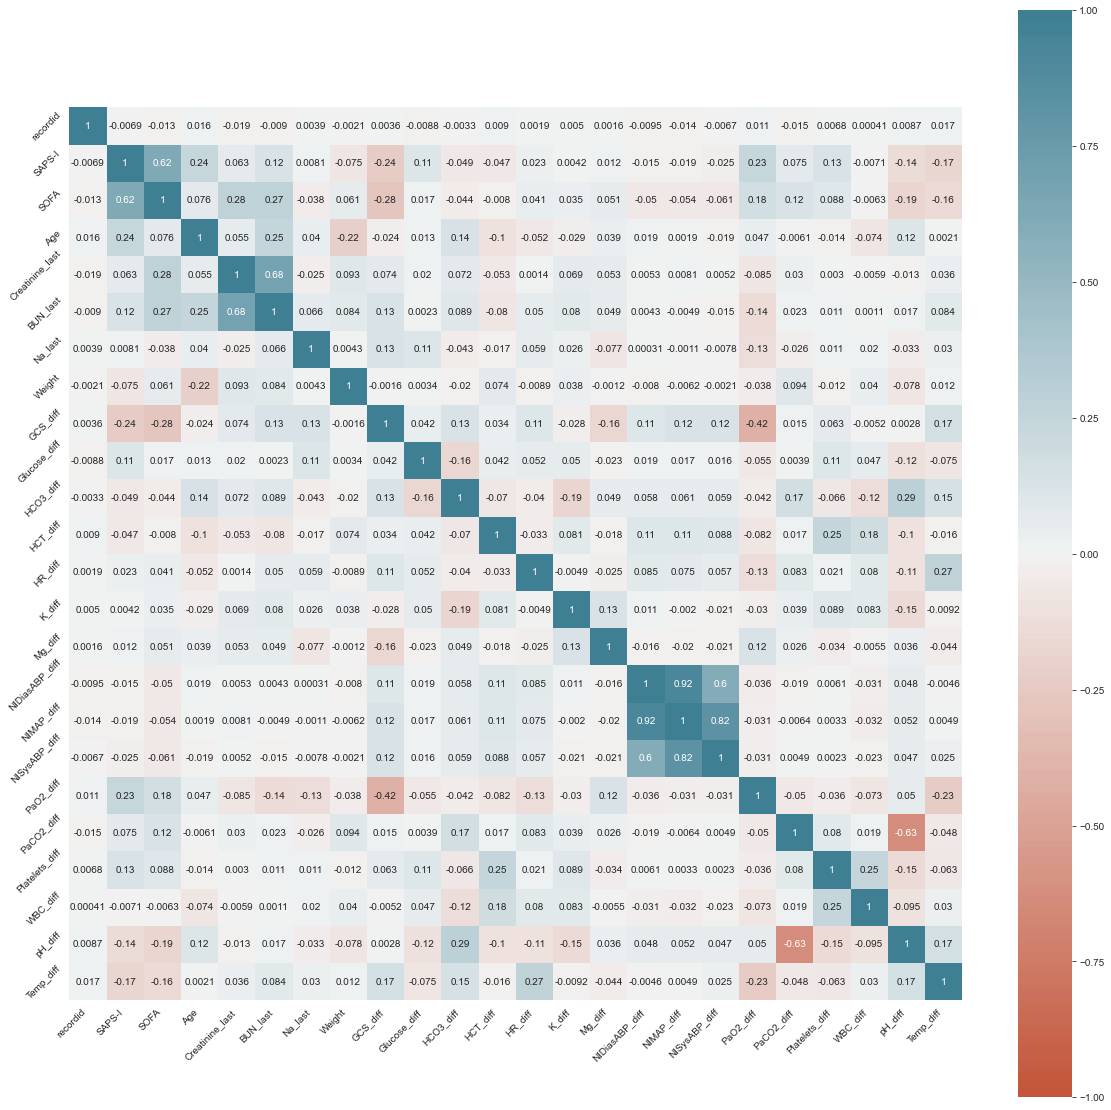

In [15]:
plot_correlation_heatmap(numerical_df)

In [16]:
def scremare_highly_correlated(df, threshold):
    corr = df.corr()
    df_after_corr = df.copy()
    cols = list(corr.columns)
    for c, col in enumerate(corr.columns):
        pos=list(np.where(corr[col]>threshold)[0])
        pos_uno = list(np.where(corr[col]==1)[0])
        pos.remove(pos_uno[0])
        #print(col + '')
        if len(pos)>0:
            for el in pos:
                #print(el)
                cols[el] = 0


    print('Before removing highly correlated columns: ' + str(len(df.columns)))
    cols_to_keep=[]
    for col in cols:
        if col!=0:
            cols_to_keep.append(col)

    print('After removing highly correlated columns: ' + str(len(cols_to_keep)))

    return df_after_corr[cols_to_keep]

In [17]:
numerical_df = scremare_highly_correlated(numerical_df, 0.8)
numerical_df

Before removing highly correlated columns: 24
After removing highly correlated columns: 21


,recordid,SAPS-I,SOFA,Age,Creatinine_last,BUN_last,Na_last,Weight,GCS_diff,Glucose_diff,...,HCT_diff,HR_diff,K_diff,Mg_diff,PaO2_diff,PaCO2_diff,Platelets_diff,WBC_diff,pH_diff,Temp_diff
0,132539,6,1,54.0,0.7,8.0,136.0,NaN,0.0,90.0,...,3.4,-13.0,0.4,-0.4,NaN,NaN,36.0,1.8,NaN,-2.7
1,132540,16,8,76.0,1.3,21.0,135.0,76.0,-12.0,-41.0,...,-4.7,23.0,0.8,1.2,204.0,-12.0,29.0,-5.9,0.08,-1.9
2,132541,21,11,44.0,0.3,3.0,138.0,56.7,2.0,-2.0,...,-0.9,29.0,-0.4,0.2,-108.0,0.0,-41.0,-2.0,0.04,0.6
3,132543,7,1,68.0,0.7,10.0,137.0,84.6,0.0,12.0,...,5.0,0.0,0.2,0.2,NaN,NaN,107.0,3.6,NaN,-0.7
4,132545,17,2,88.0,1.0,25.0,139.0,NaN,0.0,21.0,...,-8.3,25.0,1.9,-0.1,NaN,NaN,12.0,-1.0,NaN,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,52.0,0.6,9.0,140.0,80.0,0.0,1.0,...,3.5,-36.0,0.7,-0.4,249.0,5.0,32.0,3.0,-0.03,-1.4
5996,151383,13,2,90.0,0.7,23.0,129.0,72.0,0.0,34.0,...,-6.0,-10.0,-0.9,0.2,NaN,NaN,59.0,0.3,NaN,-1.0
5997,149623,12,9,72.0,2.8,67.0,144.0,185.0,0.0,11.0,...,2.9,-6.0,0.6,0.1,-43.0,24.0,-12.0,-3.1,-0.12,0.5
5998,145366,18,11,52.0,1.0,25.0,134.0,95.9,0.0,-13.0,...,-6.7,73.0,-0.9,-0.6,8.0,-9.0,2.0,-2.7,-0.06,0.8


In [18]:
mean_values = numerical_df.mean()
mean_values

recordid           140965.097167
SAPS-I                 14.170333
SOFA                    6.345500
Age                    64.568500
Creatinine_last         1.358106
BUN_last               25.456378
Na_last               138.878016
Weight                 81.332485
GCS_diff               -2.301052
Glucose_diff           20.407496
HCO3_diff              -1.078138
HCT_diff                1.116401
HR_diff                 3.770595
K_diff                  0.113969
Mg_diff                -0.109279
PaO2_diff              86.523344
PaCO2_diff              1.379640
Platelets_diff         23.628346
WBC_diff                0.609017
pH_diff                -0.029230
Temp_diff              -0.454552
dtype: float64

In [19]:
numerical_df = numerical_df.fillna(value=mean_values)
numerical_df.isnull().sum()

recordid           0
SAPS-I             0
SOFA               0
Age                0
Creatinine_last    0
BUN_last           0
Na_last            0
Weight             0
GCS_diff           0
Glucose_diff       0
HCO3_diff          0
HCT_diff           0
HR_diff            0
K_diff             0
Mg_diff            0
PaO2_diff          0
PaCO2_diff         0
Platelets_diff     0
WBC_diff           0
pH_diff            0
Temp_diff          0
dtype: int64

array([[<AxesSubplot:title={'center':'recordid'}>,
        <AxesSubplot:title={'center':'SAPS-I'}>,
        <AxesSubplot:title={'center':'SOFA'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Creatinine_last'}>],
       [<AxesSubplot:title={'center':'BUN_last'}>,
        <AxesSubplot:title={'center':'Na_last'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'GCS_diff'}>,
        <AxesSubplot:title={'center':'Glucose_diff'}>],
       [<AxesSubplot:title={'center':'HCO3_diff'}>,
        <AxesSubplot:title={'center':'HCT_diff'}>,
        <AxesSubplot:title={'center':'HR_diff'}>,
        <AxesSubplot:title={'center':'K_diff'}>,
        <AxesSubplot:title={'center':'Mg_diff'}>],
       [<AxesSubplot:title={'center':'PaO2_diff'}>,
        <AxesSubplot:title={'center':'PaCO2_diff'}>,
        <AxesSubplot:title={'center':'Platelets_diff'}>,
        <AxesSubplot:title={'center':'WBC_diff'}>,
        <AxesSubplot:titl

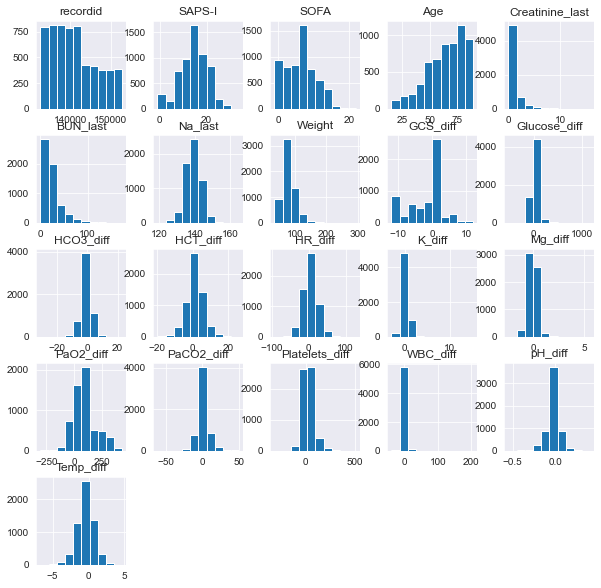

In [20]:
numerical_df.hist(figsize=(10,10))

C:\Users\Alice Donati\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

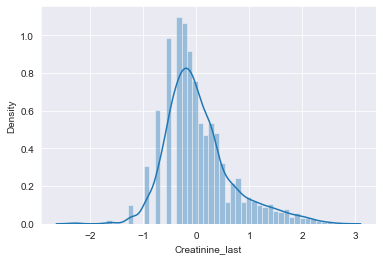

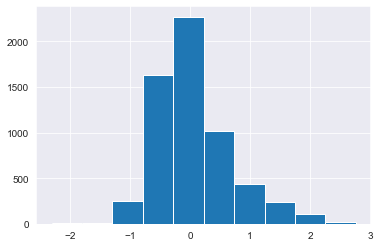

In [21]:
import matplotlib.pyplot as plt
crea_log= np.log(numerical_df['Creatinine_last'])
sns.distplot(crea_log)
fig = plt.figure()
crea_log.hist()

C:\Users\Alice Donati\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

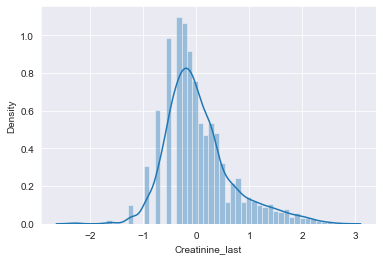

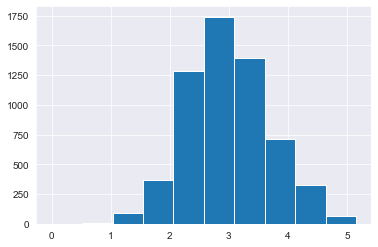

In [22]:
import matplotlib.pyplot as plt
BUN_log= np.log(numerical_df['BUN_last'])
sns.distplot(crea_log)
fig = plt.figure()
BUN_log.hist()

In [23]:
numerical_df=numerical_df.drop(['Creatinine_last', 'BUN_last'], axis=1)
numerical_df.insert(2, 'Creatinine_last_log', crea_log)
numerical_df.insert(3, 'BUN_last_log', BUN_log)
numerical_df

,recordid,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,Na_last,Weight,GCS_diff,Glucose_diff,...,HCT_diff,HR_diff,K_diff,Mg_diff,PaO2_diff,PaCO2_diff,Platelets_diff,WBC_diff,pH_diff,Temp_diff
0,132539,6,-0.356675,2.079442,1,54.0,136.0,81.332485,0.0,90.0,...,3.4,-13.0,0.4,-0.4,86.523344,1.37964,36.0,1.8,-0.02923,-2.7
1,132540,16,0.262364,3.044522,8,76.0,135.0,76.000000,-12.0,-41.0,...,-4.7,23.0,0.8,1.2,204.000000,-12.00000,29.0,-5.9,0.08000,-1.9
2,132541,21,-1.203973,1.098612,11,44.0,138.0,56.700000,2.0,-2.0,...,-0.9,29.0,-0.4,0.2,-108.000000,0.00000,-41.0,-2.0,0.04000,0.6
3,132543,7,-0.356675,2.302585,1,68.0,137.0,84.600000,0.0,12.0,...,5.0,0.0,0.2,0.2,86.523344,1.37964,107.0,3.6,-0.02923,-0.7
4,132545,17,0.000000,3.218876,2,88.0,139.0,81.332485,0.0,21.0,...,-8.3,25.0,1.9,-0.1,86.523344,1.37964,12.0,-1.0,-0.02923,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,-0.510826,2.197225,6,52.0,140.0,80.000000,0.0,1.0,...,3.5,-36.0,0.7,-0.4,249.000000,5.00000,32.0,3.0,-0.03000,-1.4
5996,151383,13,-0.356675,3.135494,2,90.0,129.0,72.000000,0.0,34.0,...,-6.0,-10.0,-0.9,0.2,86.523344,1.37964,59.0,0.3,-0.02923,-1.0
5997,149623,12,1.029619,4.204693,9,72.0,144.0,185.000000,0.0,11.0,...,2.9,-6.0,0.6,0.1,-43.000000,24.00000,-12.0,-3.1,-0.12000,0.5
5998,145366,18,0.000000,3.218876,11,52.0,134.0,95.900000,0.0,-13.0,...,-6.7,73.0,-0.9,-0.6,8.000000,-9.00000,2.0,-2.7,-0.06000,0.8


In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(numerical_df)
scaled_df=pd.DataFrame(scaler.transform(numerical_df))
scaled_df.columns = numerical_df.columns

scaled_df

,recordid,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,Na_last,Weight,GCS_diff,Glucose_diff,...,HCT_diff,HR_diff,K_diff,Mg_diff,PaO2_diff,PaCO2_diff,Platelets_diff,WBC_diff,pH_diff,Temp_diff
0,-1.508884,-1.342626,-0.629755,-1.280057,-1.264658,-0.604645,-0.669431,-6.327279e-16,0.448481,0.886376,...,0.475613,-0.820167,0.379723,-0.660524,1.318287e-16,2.766267e-17,0.222602,0.205010,-8.646334e-17,-1.902601
1,-1.508705,0.300668,0.333993,0.085820,0.391428,0.654019,-0.902033,-2.374250e-01,-1.890351,-0.782126,...,-1.211401,0.940415,0.910746,2.974703,1.089787e+00,-1.666857e+00,0.096652,-1.120432,1.361086e+00,-1.224749
2,-1.508526,1.122315,-1.948867,-2.668222,1.101179,-1.176765,-0.204228,-1.096743e+00,0.838286,-0.285397,...,-0.419962,1.233845,-0.682324,0.702686,-1.804519e+00,-1.718778e-01,-1.162852,-0.449104,8.626583e-01,0.893538
3,-1.508168,-1.178297,-0.629755,-0.964242,-1.264658,0.196323,-0.436830,1.454837e-01,0.448481,-0.107083,...,0.808850,-0.184401,0.114211,0.702686,1.318287e-16,2.766267e-17,1.500099,0.514854,-8.646334e-17,-0.207972
4,-1.507810,0.464998,-0.074468,0.332582,-1.028074,1.340564,0.028374,-6.327279e-16,0.448481,0.007547,...,-1.961185,1.038225,2.371061,0.021081,1.318287e-16,2.766267e-17,-0.209228,-0.276969,-8.646334e-17,1.317195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.965126,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,0.260976,-5.932794e-02,0.448481,-0.247187,...,0.496440,-1.944983,0.777991,-0.660524,1.507234e+00,4.510303e-01,0.150630,0.411573,-9.589378e-03,-0.801092
5996,1.865562,-0.192320,-0.629755,0.214572,-1.028074,1.454988,-2.297644,-4.155221e-01,0.448481,0.173123,...,-1.482156,-0.673452,-1.346103,0.702686,1.318287e-16,2.766267e-17,0.636439,-0.053193,-8.646334e-17,-0.462166
5997,1.550394,-0.356650,1.528490,1.727806,0.628011,0.425171,1.191382,4.615720e+00,0.448481,-0.119820,...,0.371476,-0.477831,0.645235,0.475485,-1.201539e+00,2.818081e+00,-0.641058,-0.638453,-1.131051e+00,0.808806
5998,0.788082,0.629327,-0.074468,0.332582,1.101179,-0.719069,-1.134635,6.486079e-01,0.448481,-0.425500,...,-1.627947,3.385667,-1.346103,-1.114927,-7.284314e-01,-1.293112e+00,-0.389157,-0.569599,-3.834098e-01,1.063001


In [25]:
frames=[scaled_df, categorical_df]
df_2 = pd.concat(frames, axis=1)
df_2

,recordid,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,Na_last,Weight,GCS_diff,Glucose_diff,...,PaCO2_diff,Platelets_diff,WBC_diff,pH_diff,Temp_diff,In-hospital_death,CCU,CSRU,SICU,Gender
0,-1.508884,-1.342626,-0.629755,-1.280057,-1.264658,-0.604645,-0.669431,-6.327279e-16,0.448481,0.886376,...,2.766267e-17,0.222602,0.205010,-8.646334e-17,-1.902601,0,0,0,1,0.0
1,-1.508705,0.300668,0.333993,0.085820,0.391428,0.654019,-0.902033,-2.374250e-01,-1.890351,-0.782126,...,-1.666857e+00,0.096652,-1.120432,1.361086e+00,-1.224749,0,0,1,0,1.0
2,-1.508526,1.122315,-1.948867,-2.668222,1.101179,-1.176765,-0.204228,-1.096743e+00,0.838286,-0.285397,...,-1.718778e-01,-1.162852,-0.449104,8.626583e-01,0.893538,0,0,0,0,0.0
3,-1.508168,-1.178297,-0.629755,-0.964242,-1.264658,0.196323,-0.436830,1.454837e-01,0.448481,-0.107083,...,2.766267e-17,1.500099,0.514854,-8.646334e-17,-0.207972,0,0,0,0,1.0
4,-1.507810,0.464998,-0.074468,0.332582,-1.028074,1.340564,0.028374,-6.327279e-16,0.448481,0.007547,...,2.766267e-17,-0.209228,-0.276969,-8.646334e-17,1.317195,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.965126,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,0.260976,-5.932794e-02,0.448481,-0.247187,...,4.510303e-01,0.150630,0.411573,-9.589378e-03,-0.801092,1,0,0,1,1.0
5996,1.865562,-0.192320,-0.629755,0.214572,-1.028074,1.454988,-2.297644,-4.155221e-01,0.448481,0.173123,...,2.766267e-17,0.636439,-0.053193,-8.646334e-17,-0.462166,0,1,0,0,0.0
5997,1.550394,-0.356650,1.528490,1.727806,0.628011,0.425171,1.191382,4.615720e+00,0.448481,-0.119820,...,2.818081e+00,-0.641058,-0.638453,-1.131051e+00,0.808806,0,1,0,0,0.0
5998,0.788082,0.629327,-0.074468,0.332582,1.101179,-0.719069,-1.134635,6.486079e-01,0.448481,-0.425500,...,-1.293112e+00,-0.389157,-0.569599,-3.834098e-01,1.063001,1,0,0,0,1.0


In [26]:
categorical_df.isnull().sum()

In-hospital_death    0
CCU                  0
CSRU                 0
SICU                 0
Gender               6
dtype: int64

In [27]:
#tolgo righe con genere nan
indexNames = df_2[df_2['Gender'].isnull()].index
df_2.drop(indexNames, inplace=True)
df_2

,recordid,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,Na_last,Weight,GCS_diff,Glucose_diff,...,PaCO2_diff,Platelets_diff,WBC_diff,pH_diff,Temp_diff,In-hospital_death,CCU,CSRU,SICU,Gender
0,-1.508884,-1.342626,-0.629755,-1.280057,-1.264658,-0.604645,-0.669431,-6.327279e-16,0.448481,0.886376,...,2.766267e-17,0.222602,0.205010,-8.646334e-17,-1.902601,0,0,0,1,0.0
1,-1.508705,0.300668,0.333993,0.085820,0.391428,0.654019,-0.902033,-2.374250e-01,-1.890351,-0.782126,...,-1.666857e+00,0.096652,-1.120432,1.361086e+00,-1.224749,0,0,1,0,1.0
2,-1.508526,1.122315,-1.948867,-2.668222,1.101179,-1.176765,-0.204228,-1.096743e+00,0.838286,-0.285397,...,-1.718778e-01,-1.162852,-0.449104,8.626583e-01,0.893538,0,0,0,0,0.0
3,-1.508168,-1.178297,-0.629755,-0.964242,-1.264658,0.196323,-0.436830,1.454837e-01,0.448481,-0.107083,...,2.766267e-17,1.500099,0.514854,-8.646334e-17,-0.207972,0,0,0,0,1.0
4,-1.507810,0.464998,-0.074468,0.332582,-1.028074,1.340564,0.028374,-6.327279e-16,0.448481,0.007547,...,2.766267e-17,-0.209228,-0.276969,-8.646334e-17,1.317195,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.965126,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,0.260976,-5.932794e-02,0.448481,-0.247187,...,4.510303e-01,0.150630,0.411573,-9.589378e-03,-0.801092,1,0,0,1,1.0
5996,1.865562,-0.192320,-0.629755,0.214572,-1.028074,1.454988,-2.297644,-4.155221e-01,0.448481,0.173123,...,2.766267e-17,0.636439,-0.053193,-8.646334e-17,-0.462166,0,1,0,0,0.0
5997,1.550394,-0.356650,1.528490,1.727806,0.628011,0.425171,1.191382,4.615720e+00,0.448481,-0.119820,...,2.818081e+00,-0.641058,-0.638453,-1.131051e+00,0.808806,0,1,0,0,0.0
5998,0.788082,0.629327,-0.074468,0.332582,1.101179,-0.719069,-1.134635,6.486079e-01,0.448481,-0.425500,...,-1.293112e+00,-0.389157,-0.569599,-3.834098e-01,1.063001,1,0,0,0,1.0


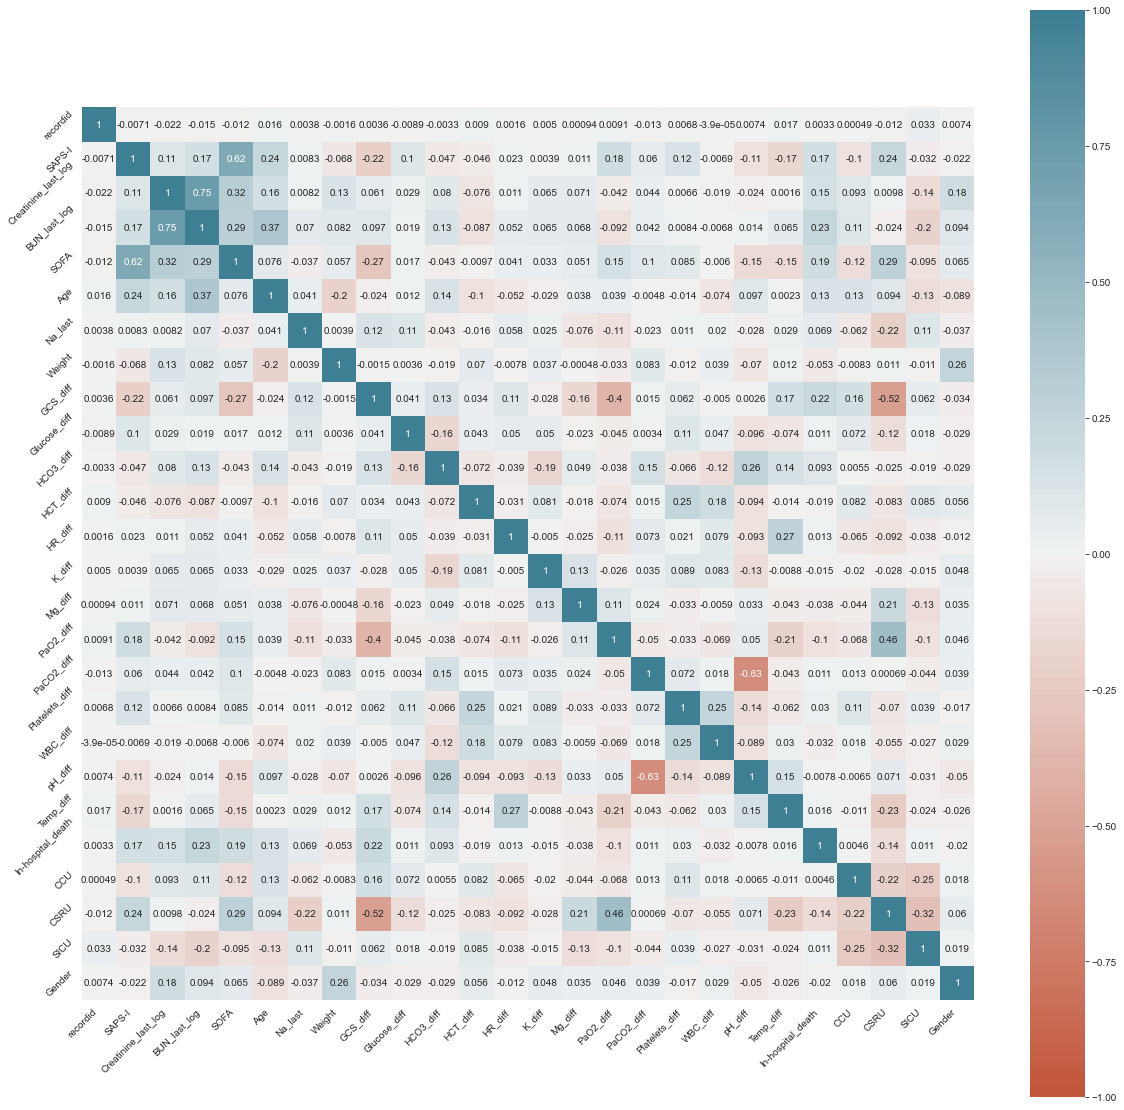

In [28]:
plot_correlation_heatmap(df_2)

In [29]:
df_2=df_2.drop(['recordid'], axis=1)
df_2

,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,Na_last,Weight,GCS_diff,Glucose_diff,HCO3_diff,...,PaCO2_diff,Platelets_diff,WBC_diff,pH_diff,Temp_diff,In-hospital_death,CCU,CSRU,SICU,Gender
0,-1.342626,-0.629755,-1.280057,-1.264658,-0.604645,-0.669431,-6.327279e-16,0.448481,0.886376,-0.258884,...,2.766267e-17,0.222602,0.205010,-8.646334e-17,-1.902601,0,0,0,1,0.0
1,0.300668,0.333993,0.085820,0.391428,0.654019,-0.902033,-2.374250e-01,-1.890351,-0.782126,-0.539712,...,-1.666857e+00,0.096652,-1.120432,1.361086e+00,-1.224749,0,0,1,0,1.0
2,1.122315,-1.948867,-2.668222,1.101179,-1.176765,-0.204228,-1.096743e+00,0.838286,-0.285397,0.021943,...,-1.718778e-01,-1.162852,-0.449104,8.626583e-01,0.893538,0,0,0,0,0.0
3,-1.178297,-0.629755,-0.964242,-1.264658,0.196323,-0.436830,1.454837e-01,0.448481,-0.107083,0.302771,...,2.766267e-17,1.500099,0.514854,-8.646334e-17,-0.207972,0,0,0,0,1.0
4,0.464998,-0.074468,0.332582,-1.028074,1.340564,0.028374,-6.327279e-16,0.448481,0.007547,-0.258884,...,2.766267e-17,-0.209228,-0.276969,-8.646334e-17,1.317195,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.793656,-0.869744,-1.113358,-0.081740,-0.719069,0.260976,-5.932794e-02,0.448481,-0.247187,0.021943,...,4.510303e-01,0.150630,0.411573,-9.589378e-03,-0.801092,1,0,0,1,1.0
5996,-0.192320,-0.629755,0.214572,-1.028074,1.454988,-2.297644,-4.155221e-01,0.448481,0.173123,0.583599,...,2.766267e-17,0.636439,-0.053193,-8.646334e-17,-0.462166,0,1,0,0,0.0
5997,-0.356650,1.528490,1.727806,0.628011,0.425171,1.191382,4.615720e+00,0.448481,-0.119820,-0.820540,...,2.818081e+00,-0.641058,-0.638453,-1.131051e+00,0.808806,0,1,0,0,0.0
5998,0.629327,-0.074468,0.332582,1.101179,-0.719069,-1.134635,6.486079e-01,0.448481,-0.425500,-1.663024,...,-1.293112e+00,-0.389157,-0.569599,-3.834098e-01,1.063001,1,0,0,0,1.0


In [30]:
df_2.to_csv('df_2.csv', index=False)